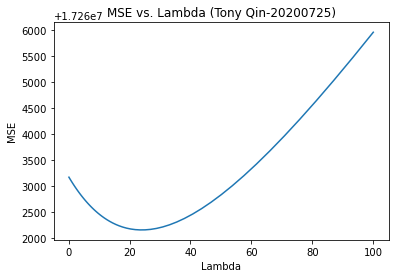

17262155.074013334
[[ 326]
 [ 326]
 [ 327]
 ...
 [2757]
 [2757]
 [2757]]


In [79]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error


def normalize_train(X_train):
    mean = np.mean(X_train, axis = 0)
    std = np.std(X_train, axis = 0)
    X = (X_train - mean) /std
    return X, mean, std

def normalize_test(X_test, trn_mean, trn_std):
    X = (X_test - trn_mean) /trn_std
    return X

diamonds = pd.read_csv('diamonds.csv')

X = diamonds[['carat', 'depth', 'table', 'x', 'y', 'z', 'clarity', 'cut', 'color']]
y = diamonds[['price']]

#Training and testing split, with 25% of the data reserved as the test set
X = X.to_numpy()
y = y.to_numpy()
[X_train, X_test, y_train, y_test] = train_test_split(X, y, test_size=0.25, random_state=101)

[X_train, trn_mean, trn_std] = normalize_train(X_train)
X_test = normalize_test(X_test, trn_mean, trn_std)

lmbda = np.logspace(-1, 2, num=101) # Lambda Values Needed for Submission
MODEL = []
MSE = []

for l in lmbda:
    ridge = Ridge(alpha=l,fit_intercept=False)
    ridge.fit(X_train,y_train)
    mse = mean_squared_error(y_test,ridge.predict(X_test))
    MODEL.append(ridge)
    MSE.append(mse)


# plot MSE with lmbda
plt.figure(figsize=(6,4))
plt.plot(lmbda,MSE)
plt.xlabel('Lambda')
plt.ylabel('MSE')
plt.title('MSE vs. Lambda (Tony Qin-20200725)')
plt.show()
    
best_lmbda = lmbda[MSE.index(min(MSE))]
print(min(MSE))
# mse = mean_squared_error(y_test, ridge.predict(X_test))
# print(mse)

# print("Training set score:{:.2f}".format(ridge.score(X_train,y_train)))
# print("Test set score:{:.2f}".format(ridge.score(X_test,y_test)))
# a = ridge.score(X_train,y_train)
# b = ridge.coef_
# c = ridge.intercept_
# print(c)


ridge = Ridge(alpha=23.442288153199225,fit_intercept=False)
ridge.fit(X_train,y_train)
b = ridge.coef_
c = ridge.intercept_
print()
